In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
file_path = r'C:\Users\user\OneDrive\Masaüstü\runtime.xlsx'

In [10]:
kernel_labels = {
    'Mean': '7x7',
    'Mean (2)': '15x15',
    'Mean (3)': '23x23',
    'Mean (4)': '31x31',
    'Mean (5)': '39x39'
}

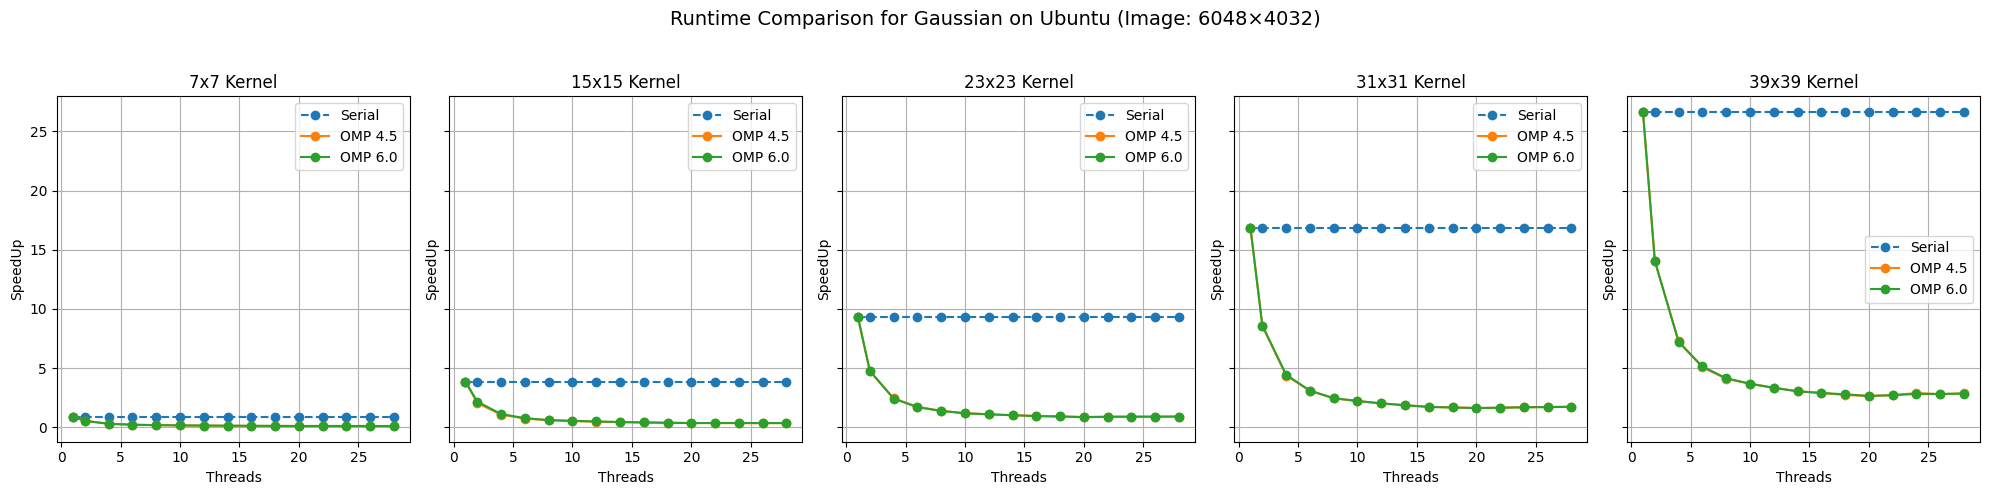

In [10]:
threads = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Create subplots for 3 kernel sizes
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Loop through each sheet and plot in the subplots
for i, (sheet_name, kernel_size) in enumerate(kernel_labels.items()):
    # Load the sheet as a DataFrame (without headers)
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')

    # Extract values
    serial_value = df.iloc[6, 2]          # C8 = row 8 (index 7), column C = index 2
    omp45_values = df.iloc[16:31, 2]      # C17:C31 = rows 17–31 → index 16–30
    omp60_values = df.iloc[16:31, 7]      # H17:H31 = column H = index 7

    # Expand serial to match the thread list
    serial_values = [serial_value] * len(threads)

    # Plot in the respective subplot
    axs[i].plot(threads, serial_values, label='Serial', marker='o', linestyle='--')
    axs[i].plot(threads, omp45_values, label='OMP 4.5', marker='o')
    axs[i].plot(threads, omp60_values, label='OMP 6.0', marker='o')
    
    # Set title and labels for each subplot
    axs[i].set_title(f'{kernel_size} Kernel')
    axs[i].set_xlabel('Threads')
    axs[i].set_ylabel('SpeedUp')
    axs[i].grid(True)
    axs[i].legend()

# Set the overall title
plt.suptitle('Runtime Comparison for Gaussian on Ubuntu (Image: 6048×4032)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

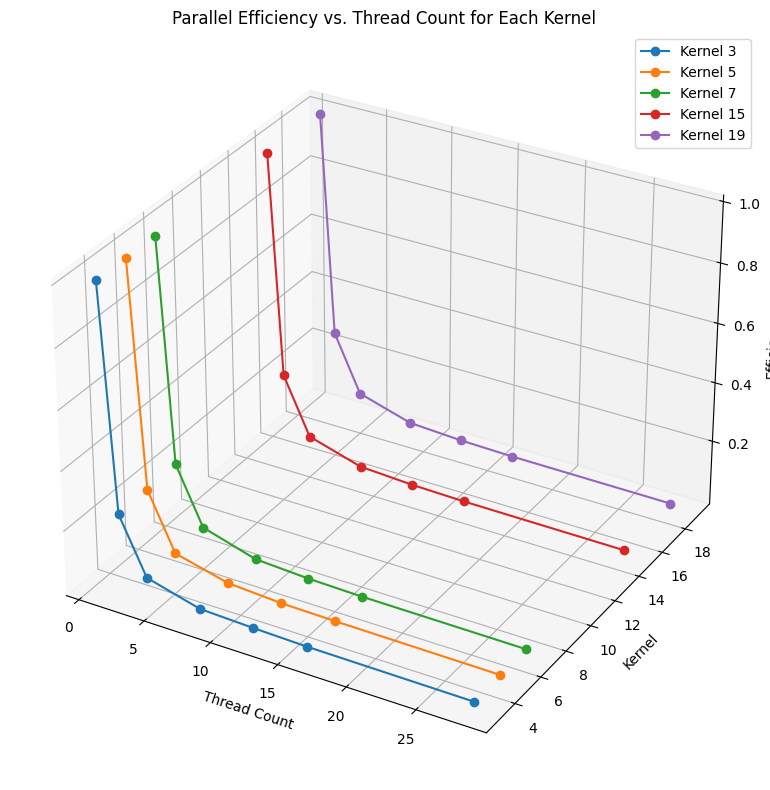

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Data
threads = np.array([1, 2, 4, 8, 12, 16, 28])
kernels = np.array([3, 5, 7, 15, 19])
execution_times = np.array([
    [1, 1, 1, 1, 1],
    [1.989974344, 1.970052677, 1.916584716, 1.916584716, 1.916584716],
    [3.824899477, 3.800921634, 3.449867566, 3.449867566, 3.449867566],
    [7.283312567, 5.958880263, 6.334997392, 6.334997392, 6.334997392],
    [7.790179994, 8.274059944, 8.290251057, 8.290251057, 8.290251057],
    [9.920503739, 8.48991849, 10.50583984, 10.50583984, 10.50583984],
    [13.02983117, 10.05530886, 12.63114687, 12.63114687, 12.63114687]
])

# Calculate speedup
speedup = execution_times[0, :] / execution_times

# Calculate efficiency
efficiency = speedup / threads[:, np.newaxis]

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot lines for each kernel showing efficiency
for i, kernel in enumerate(kernels):
    ax.plot(threads, [kernel] * len(threads), efficiency[:, i],
            marker='o', label=f'Kernel {kernel}')

# Axis labels
ax.set_xlabel('Thread Count')
ax.set_ylabel('Kernel')
ax.set_zlabel('Efficiency')
ax.set_title('Parallel Efficiency vs. Thread Count for Each Kernel')
ax.legend()

plt.tight_layout()
plt.show()


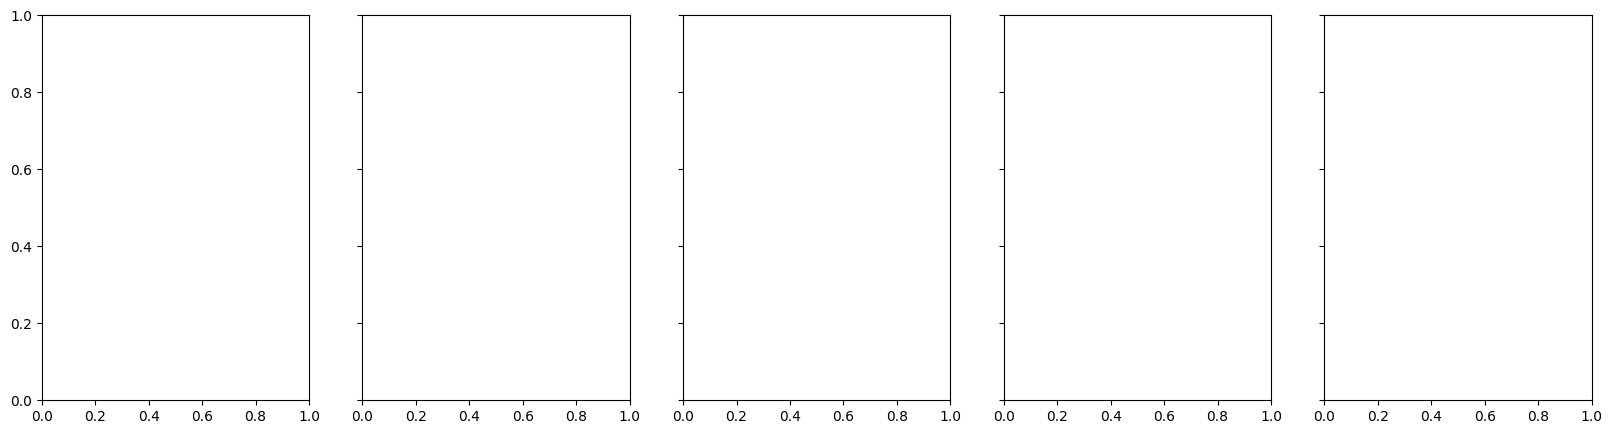

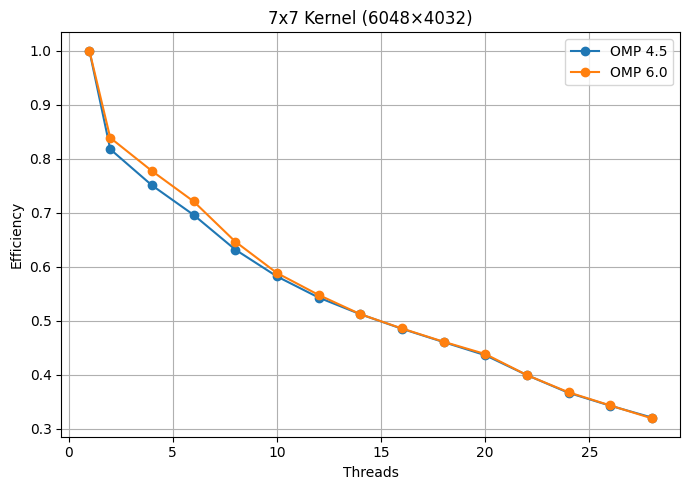

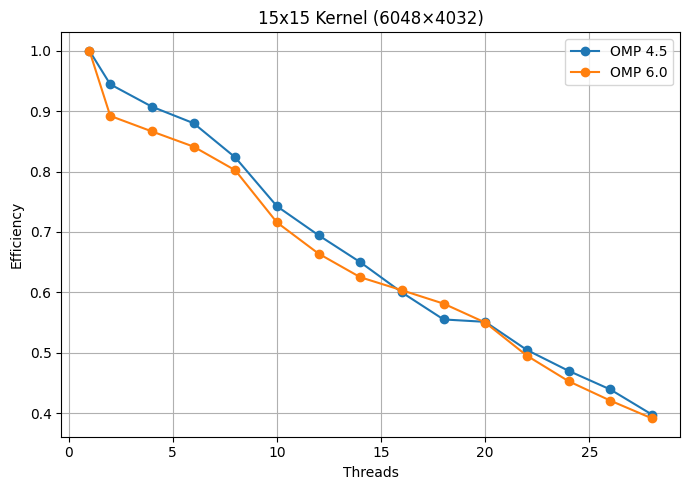

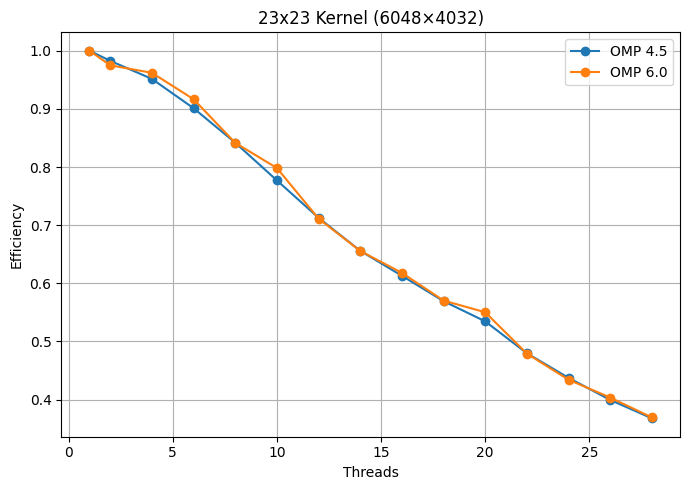

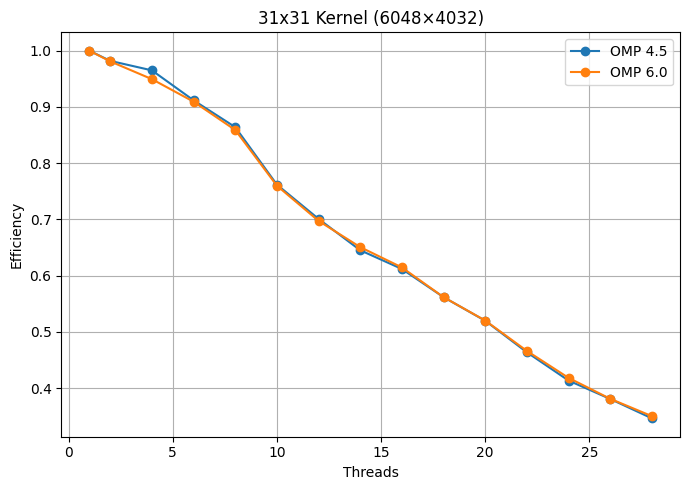

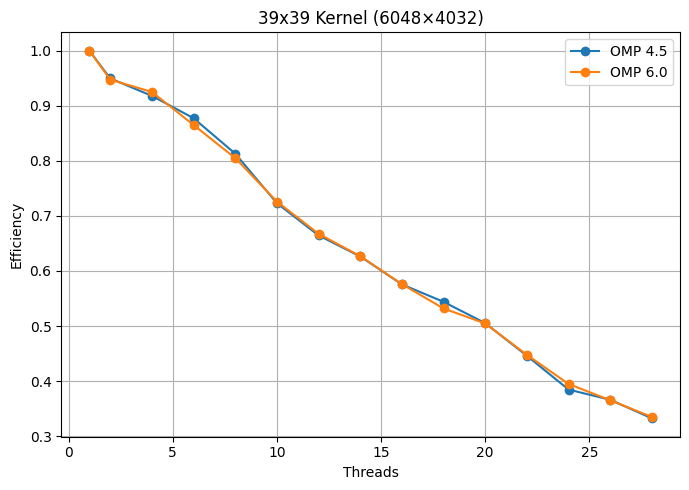

In [14]:
threads = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Create subplots for 3 kernel sizes
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Loop through each sheet and plot in the subplots
for i, (sheet_name, kernel_size) in enumerate(kernel_labels.items()):
    # Load the sheet as a DataFrame (without headers)
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')

    # Extract values

    serial_value = df.iloc[6, 2]          # C8 = row 8 (index 7), column C = index 2
    omp45_values = df.iloc[16:31, 2]      # C17:C31 = rows 17–31 → index 16–30
    omp60_values = df.iloc[16:31, 7]      # H17:H31 = column H = index 7

    # Expand serial to match the thread list
    serial_values = [serial_value] * len(threads)

    omp45_speedup = serial_value / omp45_values
    omp60_speedup = serial_value / omp60_values

    omp45_efficiency = omp45_speedup / threads
    omp60_efficiency = omp60_speedup / threads

    #serial_speedup = [1.0] * len(threads)

    plt.figure(figsize=(7, 5))

    # Plot data for the current kernel
    #plt.plot(threads, serial_speedup, label='Serial', marker='o')
    #plt.plot(threads, omp45_speedup, label='OMP 4.5', marker='o')
    #plt.plot(threads, omp60_speedup, label='OMP 6.0', marker='o')
    plt.plot(threads, omp45_efficiency, label='OMP 4.5', marker='o')
    plt.plot(threads, omp60_efficiency, label='OMP 6.0', marker='o')
    #plt.plot(threads, omp45_values, label='OMP 4.5', marker='o')
    #plt.plot(threads, omp60_values, label='OMP 6.0', marker='o')
    

    # Set title and labels
    plt.title(f'{kernel_size} Kernel (6048×4032)')
    plt.xlabel('Threads')
    plt.ylabel('Efficiency')
    plt.legend()
    plt.grid(True)
    
    # Optionally, you can set custom y-limits for each plot based on expected ranges
    if kernel_size == 'Gaussian':
        plt.ylim([0, 20])  # Adjust for the 5x5 kernel
    elif kernel_size == 'Gaussian (2)':
        plt.ylim([0, 100])  # Adjust for the 11x11 kernel
    elif kernel_size == 'Gaussian (3)':
        plt.ylim([0, 300])  # Adjust for the 15x15 kernel
    elif kernel_size == 'Gaussian (4)':
        plt.ylim([0, 300])  # Adjust for the 15x15 kernel
    elif kernel_size == 'Gaussian (5)':
        plt.ylim([0, 300])  # Adjust for the 15x15 kernel
    
    plt.tight_layout()
    
    # Show the plot for the current kernel size
    plt.show()

In [26]:
import pandas as pd

# Define the file path and kernel labels
file_path = r'C:\Users\user\OneDrive\Masaüstü\runtime.xlsx'
kernel_labels = {
    'Gaussian': '7x7',
    'Gaussian (2)': '15x15',
    'Gaussian (3)': '23x23',
    'Gaussian (4)': '31x31',
    'Gaussian (5)': '39x39'
}
threads = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Prepare an empty list to collect the table rows
table_data = []

# Loop through each sheet (kernel size) and collect the data for the table
for sheet_name, kernel_size in kernel_labels.items():
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')
    
    # Extract the values for OpenMP 4.5 and 6.0
    serial_value = df.iloc[6, 2]          # C8 = row 8 (index 7), column C = index 2
    omp45_values = df.iloc[17:31, 2]      # C17:C31 = rows 17–31 → index 16–30
    omp60_values = df.iloc[17:31, 7]      # H17:H31 = column H = index 7
    
    # Compute the speedup (serial_value / omp45_values and omp60_values)
    omp45_speedup = serial_value / omp45_values
    omp60_speedup = serial_value / omp60_values

    omp45_efficiency = omp45_speedup / threads
    omp60_efficiency = omp60_speedup / threads
    
    # Prepare the LaTeX row for each kernel size and OpenMP version
    #omp45_row = [f"& {kernel_size}"] + [f"{value:.3f}" for value in omp45_speedup]
    #omp60_row = [f"& {kernel_size}"] + [f"{value:.3f}" for value in omp60_speedup]
    omp45_row = [f"& {kernel_size}"] + [f"{value:.3f}" for value in omp45_efficiency]
    omp60_row = [f"& {kernel_size}"] + [f"{value:.3f}" for value in omp60_efficiency]
    
    # Add the rows to the table data
    table_data.append(("OpenMP 4.5", omp45_row))
    table_data.append(("OpenMP 6.0", omp60_row))

# Now create the LaTeX table format from the table_data
latex_table = """
\\begin{table*}[htbp]
\\centering
\\caption{Efficiency (s) Comparison for Gaussian Filter on Ubuntu (Image: 6048x4032)}
\\resizebox{0.85\\textwidth}{!}{
\\begin{tabular}{|l|c|*{14}{c|}}
\\hline
\\multirow{2}{*}{\\textbf{Version}} & \\multirow{2}{*}{\\textbf{Kernel}} & \\multicolumn{14}{c|}{\\textbf{Number of Threads}} \\\\ \\cline{3-16}
 &  & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 & 22 & 24 & 26 & 28 \\\\
\\hline
"""

# Add each row of the table to the LaTeX format
for version, row in table_data:
    latex_table += f"\\multirow{{5}}{{*}}{{{version}}} "  # Version
    latex_table += "".join([f"{item} & " for item in row[:-1]]) + f"{row[-1]} \\\\ \n"  # Join row values with &

latex_table += "\\hline\n\\end{tabular}}\n\\label{tab:efficiency_gaussian_summary}\n\\end{table*}"

# Print the LaTeX table (or save it to a file)
print(latex_table)



\begin{table*}[htbp]
\centering
\caption{Efficiency (s) Comparison for Gaussian Filter on Ubuntu (Image: 6048x4032)}
\resizebox{0.85\textwidth}{!}{
\begin{tabular}{|l|c|*{14}{c|}}
\hline
\multirow{2}{*}{\textbf{Version}} & \multirow{2}{*}{\textbf{Kernel}} & \multicolumn{14}{c|}{\textbf{Number of Threads}} \\ \cline{3-16}
 &  & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 & 22 & 24 & 26 & 28 \\
\hline
\multirow{5}{*}{OpenMP 4.5} & 7x7 & 0.818 & 0.751 & 0.696 & 0.632 & 0.582 & 0.543 & 0.512 & 0.485 & 0.461 & 0.436 & 0.400 & 0.367 & 0.343 & 0.321 \\ 
\multirow{5}{*}{OpenMP 6.0} & 7x7 & 0.839 & 0.777 & 0.721 & 0.647 & 0.589 & 0.548 & 0.512 & 0.486 & 0.461 & 0.439 & 0.400 & 0.368 & 0.343 & 0.320 \\ 
\multirow{5}{*}{OpenMP 4.5} & 15x15 & 0.944 & 0.907 & 0.880 & 0.823 & 0.743 & 0.695 & 0.650 & 0.600 & 0.555 & 0.551 & 0.505 & 0.470 & 0.439 & 0.398 \\ 
\multirow{5}{*}{OpenMP 6.0} & 15x15 & 0.892 & 0.866 & 0.841 & 0.802 & 0.716 & 0.664 & 0.625 & 0.603 & 0.581 & 0.550 & 0.495 & 0.453 & 0.421 & 0.

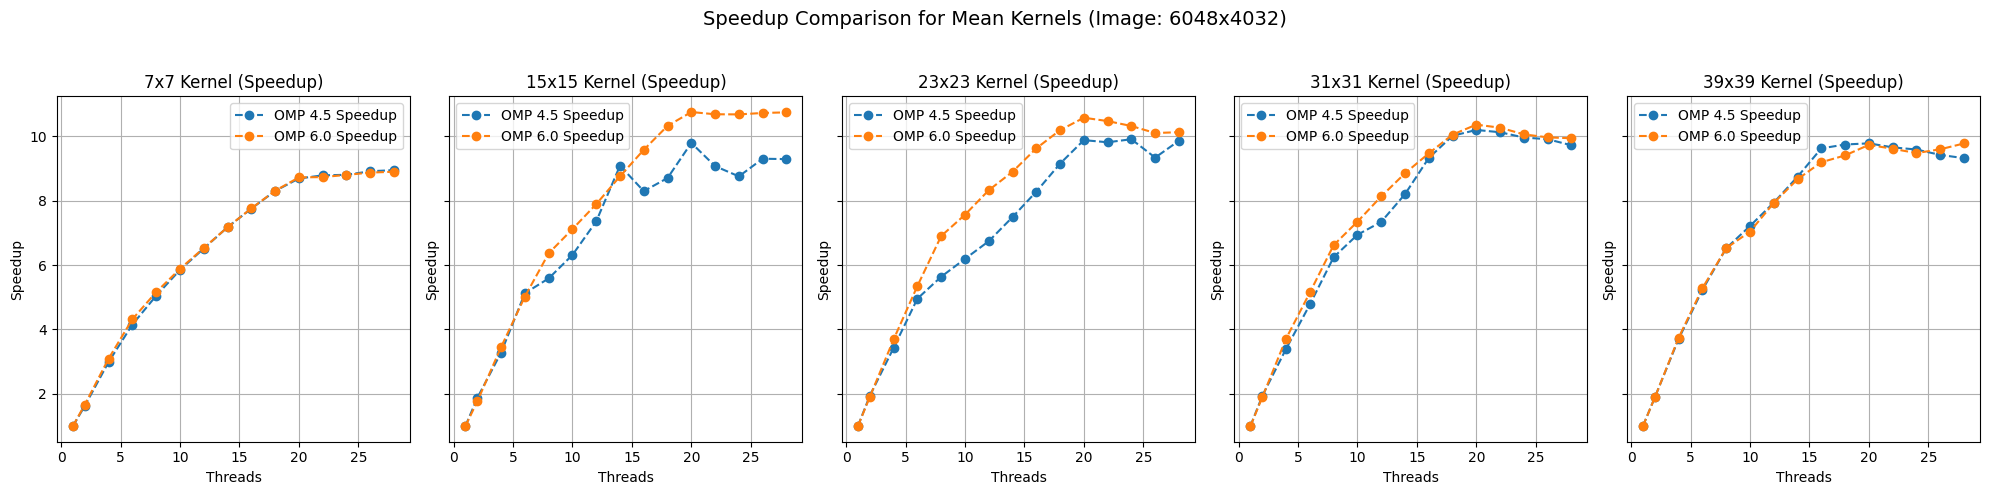

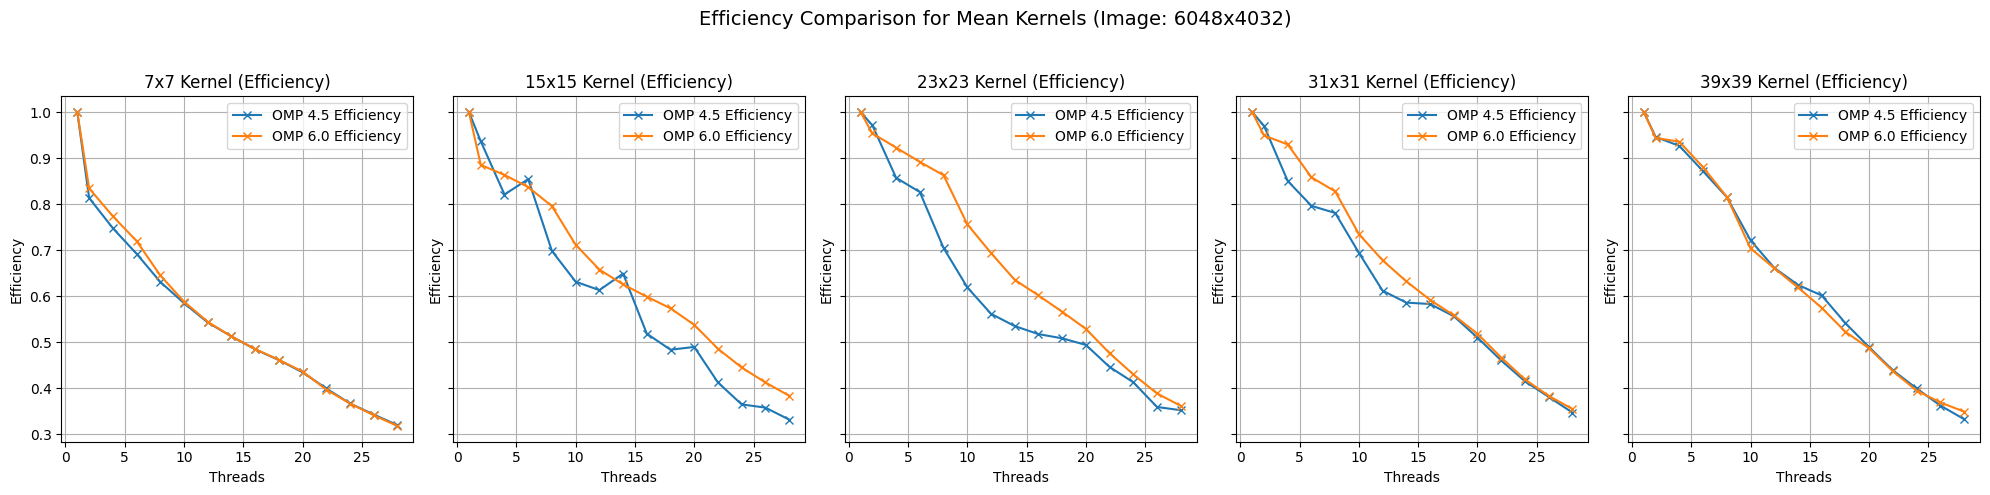

In [11]:
threads = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Create subplots for 5 kernel sizes (separate speedup and efficiency plots)
fig_speedup, axs_speedup = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig_efficiency, axs_efficiency = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Loop through each sheet and plot in the subplots
for i, (sheet_name, kernel_size) in enumerate(kernel_labels.items()):
    # Load the sheet as a DataFrame (without headers)
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')

    # Extract values
    serial_value = df.iloc[5, 2]          # C8 = row 8 (index 7), column C = index 2
    omp45_values = df.iloc[16:31, 2]      # C17:C31 = rows 17–31 → index 16–30
    omp60_values = df.iloc[16:31, 7]      # H17:H31 = column H = index 7

    # Expand serial to match the thread list
    serial_values = [serial_value] * len(threads)

    # Calculate speedup and efficiency
    omp45_speedup = serial_value / omp45_values
    omp60_speedup = serial_value / omp60_values

    omp45_efficiency = omp45_speedup / threads
    omp60_efficiency = omp60_speedup / threads

    # Plotting speedup for the current kernel size
    axs_speedup[i].plot(threads, omp45_speedup, label='OMP 4.5 Speedup', marker='o', linestyle='--')
    axs_speedup[i].plot(threads, omp60_speedup, label='OMP 6.0 Speedup', marker='o', linestyle='--')
    
    # Set title and labels for speedup
    axs_speedup[i].set_title(f'{kernel_size} Kernel (Speedup)')
    axs_speedup[i].set_xlabel('Threads')
    axs_speedup[i].set_ylabel('Speedup')
    axs_speedup[i].grid(True)
    axs_speedup[i].legend()

    # Plotting efficiency for the current kernel size
    axs_efficiency[i].plot(threads, omp45_efficiency, label='OMP 4.5 Efficiency', marker='x')
    axs_efficiency[i].plot(threads, omp60_efficiency, label='OMP 6.0 Efficiency', marker='x')

    # Set title and labels for efficiency
    axs_efficiency[i].set_title(f'{kernel_size} Kernel (Efficiency)')
    axs_efficiency[i].set_xlabel('Threads')
    axs_efficiency[i].set_ylabel('Efficiency')
    axs_efficiency[i].grid(True)
    axs_efficiency[i].legend()

# Set overall titles
fig_speedup.suptitle('Speedup Comparison for Mean Kernels (Image: 6048x4032)', fontsize=14)
fig_efficiency.suptitle('Efficiency Comparison for Mean Kernels (Image: 6048x4032)', fontsize=14)

# Adjust layout for both figures
fig_speedup.tight_layout(rect=[0, 0, 1, 0.95])
fig_efficiency.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figures as PDFs
fig_speedup.savefig('speedup_mean_comparison.pdf', format='pdf')
fig_efficiency.savefig('efficiency_mean_comparison.pdf', format='pdf')

# Optionally, you can show the plots
plt.show()